In [2]:
from hypeminer.sentiment_analysis import RobertaSentimentAnalysis
from hypeminer.stream_tweets import TweetStreamer
from hypecommons import *

import numpy as np

In [5]:
rob = RobertaSentimentAnalysis()

In [8]:
currency = 'BTCBUSD'

In [27]:
streamer = TweetStreamer(currency)

store = []

index = {'neutral': [], 'positive': [], 'negative': []}

for file_id in streamer.list_file_ids():
    tweets, timestamp, filename = streamer.tweets_from_dump(file_id)
    # predict sentiment
    preds = {'neutral': [], 'positive': [], 'negative': []}
    for tweet in tweets[0]['results']:
        text = tweet['data']['text'] if 'data' in tweet else tweet['text']
        pred = rob.predict(text)
        for k, v in preds.items():
            v.append(pred[k])    
    for k in preds:
        preds[k] = np.array(preds[k]).mean()
        index[k].append(preds[k])
    store.append(preds)
    print(f"{timestamp}: {preds}")

2021-05-14 12:00:00: {'neutral': 0.5718517, 'positive': 0.29158872, 'negative': 0.13655964}
2021-05-14 13:00:00: {'neutral': 0.53879243, 'positive': 0.22299346, 'negative': 0.23821406}
2021-05-14 14:00:00: {'neutral': 0.5332511, 'positive': 0.30060157, 'negative': 0.16614735}
2021-05-14 15:00:00: {'neutral': 0.59003586, 'positive': 0.25862446, 'negative': 0.1513397}
2021-05-14 16:00:00: {'neutral': 0.47014466, 'positive': 0.25654748, 'negative': 0.27330777}
2021-05-14 17:00:00: {'neutral': 0.5233713, 'positive': 0.28069395, 'negative': 0.19593473}
2021-05-14 18:00:00: {'neutral': 0.54856986, 'positive': 0.22749309, 'negative': 0.22393712}
2021-05-14 19:00:00: {'neutral': 0.5816883, 'positive': 0.23702744, 'negative': 0.18128431}
2021-05-14 20:00:00: {'neutral': 0.5707235, 'positive': 0.25649795, 'negative': 0.1727786}
2021-05-14 21:00:00: {'neutral': 0.494883, 'positive': 0.34341854, 'negative': 0.16169849}
2021-05-14 22:00:00: {'neutral': 0.5367928, 'positive': 0.34907272, 'negative':

2021-05-18 06:00:00: {'neutral': 0.4958953, 'positive': 0.36417705, 'negative': 0.13992763}
2021-05-18 07:00:00: {'neutral': 0.5348341, 'positive': 0.35868782, 'negative': 0.10647808}
2021-05-18 08:00:00: {'neutral': 0.47697103, 'positive': 0.36866465, 'negative': 0.1543643}
2021-05-18 09:00:00: {'neutral': 0.53450614, 'positive': 0.33919433, 'negative': 0.1262995}
2021-05-18 10:00:00: {'neutral': 0.5633341, 'positive': 0.3121025, 'negative': 0.12456346}
2021-05-18 11:00:00: {'neutral': 0.53612924, 'positive': 0.38760728, 'negative': 0.0762635}
2021-05-18 12:00:00: {'neutral': 0.55832666, 'positive': 0.31087738, 'negative': 0.13079597}
2021-05-18 13:00:00: {'neutral': 0.5317509, 'positive': 0.29218844, 'negative': 0.1760606}
2021-05-18 14:00:00: {'neutral': 0.59356713, 'positive': 0.2608827, 'negative': 0.1455502}
2021-05-18 15:00:00: {'neutral': 0.4672471, 'positive': 0.3479463, 'negative': 0.18480663}
2021-05-18 16:00:00: {'neutral': 0.6209986, 'positive': 0.2022947, 'negative': 0.17

2021-05-22 00:00:00: {'neutral': 0.51709956, 'positive': 0.29675364, 'negative': 0.18614678}
2021-05-22 01:00:00: {'neutral': 0.5846255, 'positive': 0.27680078, 'negative': 0.1385738}
2021-05-22 02:00:00: {'neutral': 0.5087997, 'positive': 0.34450802, 'negative': 0.14669234}
2021-05-22 03:00:00: {'neutral': 0.5997526, 'positive': 0.2542649, 'negative': 0.14598252}
2021-05-22 04:00:00: {'neutral': 0.48435497, 'positive': 0.3192173, 'negative': 0.19642775}
2021-05-22 05:00:00: {'neutral': 0.50775695, 'positive': 0.3206331, 'negative': 0.17161001}
2021-05-22 06:00:00: {'neutral': 0.4976857, 'positive': 0.33598435, 'negative': 0.16632998}
2021-05-22 07:00:00: {'neutral': 0.54915214, 'positive': 0.32935008, 'negative': 0.121497795}
2021-05-22 08:00:00: {'neutral': 0.52287364, 'positive': 0.31437755, 'negative': 0.16274889}
2021-05-22 09:00:00: {'neutral': 0.51369935, 'positive': 0.33688357, 'negative': 0.14941704}
2021-05-22 10:00:00: {'neutral': 0.50758684, 'positive': 0.35304296, 'negativ

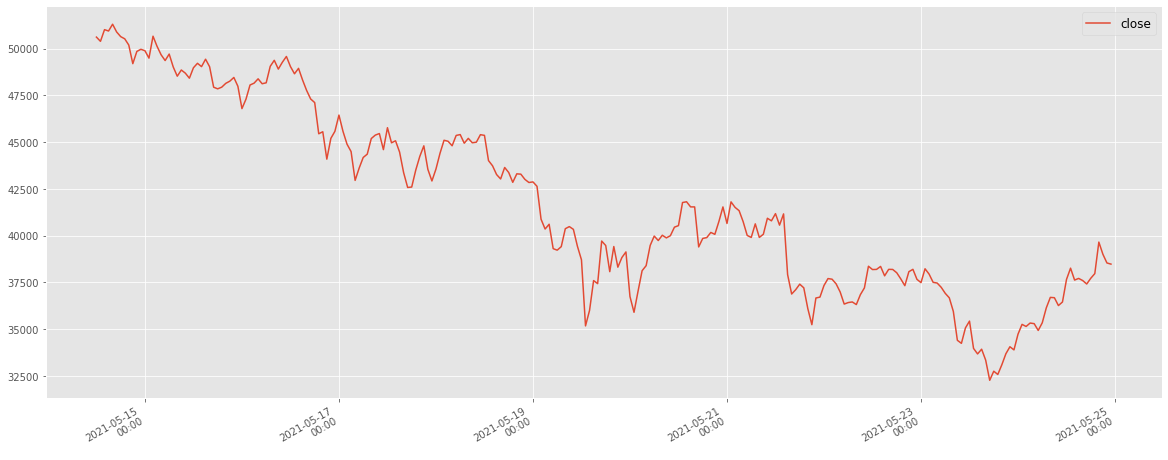

In [29]:
df = download_history_fast(currency, '20210514120000', freq=60, days=10.45)
plot(plt.plot, df, ['close'], [None])

In [36]:
for k in index:
    df[k] = index[k]

df.drop('up_or_down', axis=1, inplace=True)    

df['score'] = df['positive'] - df['negative']

df['up_or_down'] = 'DOWN'
df.loc[df['close'].diff() >= 0, 'up_or_down'] = 'UP'
df

,open,high,low,close,volume,trades,neutral,positive,negative,score,up_or_down
2021-05-14 12:00:00,50797.06,51026.47,50558.01,50615.72,668.926880,29129,0.571852,0.291589,0.136560,0.155029,DOWN
2021-05-14 13:00:00,50615.73,50695.19,50311.06,50389.36,656.920832,27724,0.538792,0.222993,0.238214,-0.015221,DOWN
2021-05-14 14:00:00,50389.36,51051.55,50127.78,51013.51,893.400221,33446,0.533251,0.300602,0.166147,0.134454,UP
2021-05-14 15:00:00,51013.51,51024.36,50567.06,50941.47,885.579488,30570,0.590036,0.258624,0.151340,0.107285,DOWN
2021-05-14 16:00:00,50941.47,51564.47,50941.46,51304.55,1006.109520,35525,0.470145,0.256547,0.273308,-0.016760,UP
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24 19:00:00,37715.40,38392.00,37441.42,37965.44,1029.583228,35995,0.532050,0.345426,0.122524,0.222903,UP
2021-05-24 20:00:00,37965.44,39859.26,37800.00,39650.94,2499.325570,63807,0.512088,0.417845,0.070067,0.347779,UP
2021-05-24 21:00:00,39658.96,39988.00,38778.42,39001.49,1608.140710,51285,0.536374,0.316887,0.146739,0.170148,DOWN
2021-05-24 22:00:00,39003.12,39340.73,38384.98,38534.67,960.384006,35846,0.534125,0.359298,0.106577,0.252721,DOWN


In [33]:
df.to_csv("btc-may2021-1h.tsv", sep='\t')

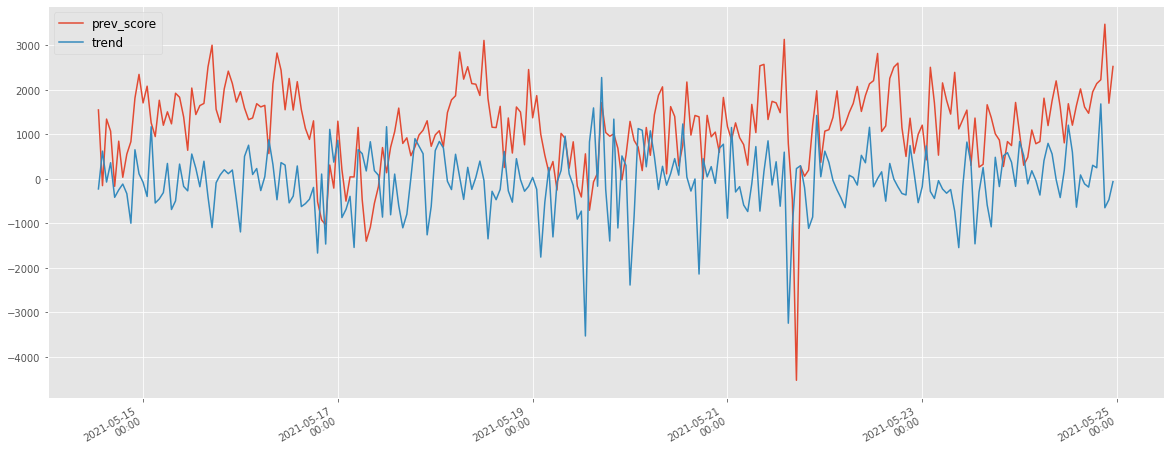

In [113]:
df['prev_score'] = 10000 * df['score'].shift(1).rolling(window=1).mean()
df['trend'] = df['close'].diff().rolling(window=1).mean()
to_plot = ['prev_score', 'trend']
plot(plt.plot, df, to_plot, [None] * len(to_plot))

In [112]:
display_whole(df)

,open,high,low,close,volume,trades,neutral,positive,negative,score,up_or_down,score_ma3,trend,prev_score
2021-05-14 12:00:00,50797.06,51026.47,50558.01,50615.72,668.926880,29129,0.571852,0.291589,0.136560,0.155029,DOWN,False,NaN,NaN
2021-05-14 13:00:00,50615.73,50695.19,50311.06,50389.36,656.920832,27724,0.538792,0.222993,0.238214,-0.015221,DOWN,True,-226.36,1550.290883
2021-05-14 14:00:00,50389.36,51051.55,50127.78,51013.51,893.400221,33446,0.533251,0.300602,0.166147,0.134454,UP,False,624.15,-152.205974
2021-05-14 15:00:00,51013.51,51024.36,50567.06,50941.47,885.579488,30570,0.590036,0.258624,0.151340,0.107285,DOWN,True,-72.04,1344.542205
2021-05-14 16:00:00,50941.47,51564.47,50941.46,51304.55,1006.109520,35525,0.470145,0.256547,0.273308,-0.016760,UP,True,363.08,1072.847694
2021-05-14 17:00:00,51304.54,51400.00,50760.01,50889.72,718.891681,30366,0.523371,0.280694,0.195935,0.084759,DOWN,False,-414.83,-167.602897
2021-05-14 18:00:00,50889.73,51103.12,50614.69,50640.75,574.320223,24765,0.548570,0.227493,0.223937,0.003556,DOWN,True,-248.97,847.592205
2021-05-14 19:00:00,50640.66,50782.59,50400.75,50524.26,788.115432,26583,0.581688,0.237027,0.181284,0.055743,DOWN,True,-116.49,35.559684
2021-05-14 20:00:00,50526.84,50536.07,50144.10,50191.91,557.183334,21706,0.570723,0.256498,0.172779,0.083719,DOWN,True,-332.35,557.431281
2021-05-14 21:00:00,50193.35,50344.37,49100.00,49194.44,1000.941713,32467,0.494883,0.343419,0.161698,0.181720,DOWN,True,-997.47,837.193429
